In [4]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import importlib

from src.visualization import visualize
from src.utils.config import Config
from src.data import make_dataset 

 
%matplotlib inline
# Use our own style file for the plots
plt.style.use('ggplot')


# setting the project dir 
project_dir = Path(os.getcwd()).resolve().parents[0]


# Import and Transform dataset (Merge, rename columns ,save results)

In [3]:
labels= pd.read_csv(project_dir / "data/raw/labels.csv")
expression_data = pd.read_csv(project_dir / "data/raw/data.csv")

#rename and Merge labels and features
expression_data.rename({"Unnamed: 0":"sample"}, axis='columns', inplace =True) 
labels.rename({"Unnamed: 0":"sample"}, axis='columns', inplace =True)
labled_expression_merged = pd.merge(labels,expression_data,on="sample")

# save 
expression_data=expression_data.drop("sample",axis=1)
expression_data.to_csv(project_dir/ "data/processed/expression_data_original.csv")
labels=labels.drop("sample",axis=1)
labels.to_csv(project_dir/ "data/processed/labels.csv")
labled_expression_merged.to_csv(project_dir/ "data/processed/merged_expression_dataset.csv", index=True)


# Importing data

## 1- expression dataset

In [3]:
expression_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
expression_data.shape

(801, 20532)

##  2- Labels

In [5]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [6]:
labels.shape

(801, 2)

In [7]:
labels.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


# Checking data distributions 
Verify whether or not we need to normalize our dataset 

[Text(0.5, 1.0, 'Labels distribution')]

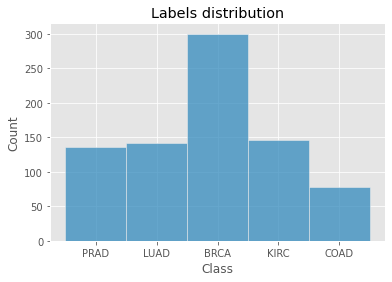

In [8]:
sns.histplot(data=labels, x="Class").set(title='Labels distribution')

## Process DATA

(801, 20531)

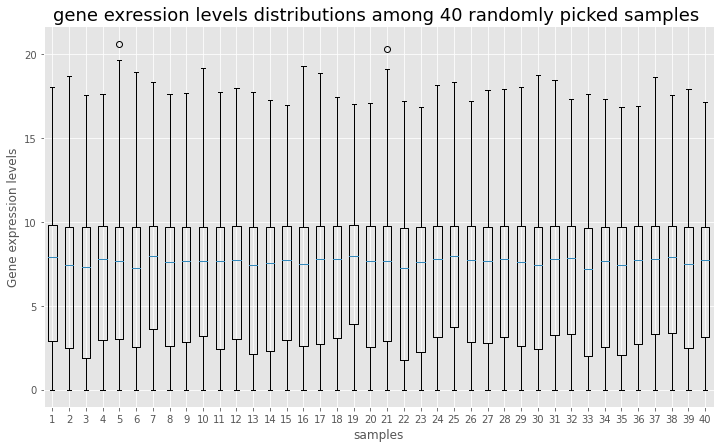

In [13]:
importlib.reload(visualize)
 # Subset data for plotting
visualize.random_k_samples_expression_dist(np.asarray(expression_data, dtype=float),40)
expression_data.shape

We can conclude that the data is already normalized because the gene expression levels are in a common scale and range for different samples , nevertheless we will try use some of sklearn built-in methods in order test their effect later .  

In [14]:
from sklearn.preprocessing import RobustScaler as rs
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import StandardScaler as sd


"""[Robust scaling ]
Robust rescaling the expression levels of each gene, 
applying the formula :
rescaled = (gene_expression - median(gene_expression)) / IQR(gene_expression) where IQR stands for Inter Quartile Range.

"""
expression_data_centered = rs().fit_transform(expression_data)
df_expression_data_centered = pd.DataFrame(expression_data_centered,columns=expression_data.columns)
df_expression_data_centered.to_csv(project_dir/ "data/processed/expression_data_centerted.csv")

"""[standard scaling ]
"""
expression_data_standardized = sd().fit_transform(expression_data)
df_expression_data_standardized = pd.DataFrame(expression_data_standardized,columns=expression_data.columns)
df_expression_data_standardized.to_csv(project_dir/ "data/processed/expression_data_standardized.csv")


y = labels['Class'].values
true_labels = np.array([Config.labels_map[element] for element in y])
df_true_labels = pd.DataFrame(true_labels,columns=["Class"])
df_true_labels.to_csv(project_dir/ "data/processed/true_labels.csv")

Here we will just rename the sample name , so it makes more sens and save these files in data/transformed 

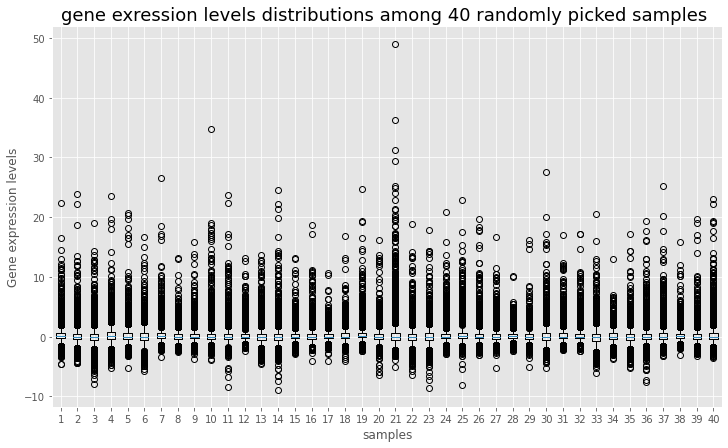

In [15]:
visualize.random_k_samples_expression_dist(expression_data_centered,40)

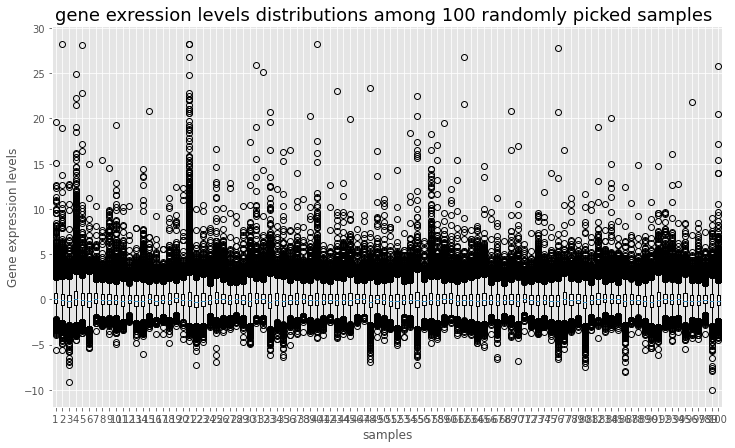

In [16]:
visualize.random_k_samples_expression_dist(expression_data_standardized,100)

## Conclusion 

In [6]:
importlib.reload(make_dataset)
make_dataset.process_data()

/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
